Comparison of gradient computation using Autograd and Theano.

Paper by Baydin et al.: https://arxiv.org/abs/1502.05767

Autograd tutorial: https://github.com/HIPS/autograd/blob/master/docs/tutorial.md

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
from matplotlib import pyplot as plt
from autograd import numpy as np
from autograd import grad, jacobian
import theano
from theano import tensor as tt

In [3]:
import initdirs

from pdata.optimize import eval_grad_on_meshgrid

## Autograd

Function from the [Baydin et al. paper](https://arxiv.org/abs/1502.05767): 

$f(x_1, x_2) = ln(x_1) + x_1 x_2 - sin(x_2)$

In [4]:
def baydin_func(x):
    return np.log(x[0]) + x[0] * x[1] - np.sin(x[1])    

baydin_grad = grad(baydin_func)

x_test = np.array([2., 5.]) # the same as in the paper
baydin_grad(x_test)

array([5.5       , 1.71633781])

Jacobian of a vector-valued function:

$f: \mathbb{R} \rightarrow \mathbb{R}^2$

In [5]:
def one_to_two_func(x):
    return np.array([np.sin(x), np.cos(x)])

one_to_two_jac = jacobian(one_to_two_func)

one_to_two_jac(10.)

array([-0.83907153,  0.54402111])

## Theano

The same function $f(x_1, x_2) = ln(x_1) + x_1 x_2 - sin(x_2)$, with using Theano

In [6]:
x = tt.vector()
baydin_expression = np.log(x[0]) + x[0] * x[1] - np.sin(x[1])
baydin_func_theano = theano.function([x], baydin_expression)

In [7]:
print('Comparing function calls f(test_value)')
print('autograd:', baydin_func(x_test))
print('theano:', baydin_func_theano(x_test))

Comparing function calls f(test_value)
autograd: 11.652071455223084
theano: 11.652071455223084


In [8]:
baydin_grad_theano = theano.function([x], tt.grad(baydin_expression, x))

In [9]:
baydin_grad_theano(x_test)

array([5.5       , 1.71633781])

## Function and gradient visualization

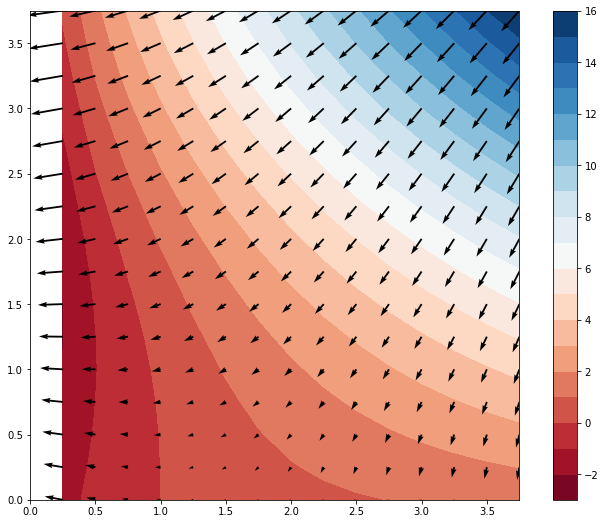

In [10]:
x_range = np.arange(0, 4, 0.25)
y_range = np.arange(0, 4, 0.25)
domain_xy = np.meshgrid(x_range, y_range)

func_z = baydin_func(domain_xy)

grad_x, grad_y = eval_grad_on_meshgrid(baydin_grad_theano, domain_xy[0], domain_xy[1])

fig, ax = plt.subplots(figsize=(12, 9))
ax.set_aspect('equal')
cnt = ax.contourf(domain_xy[0], domain_xy[1], func_z, cmap='RdBu', levels=20)
ax.quiver(x_range, y_range, -grad_x, -grad_y)
fig.colorbar(cnt, ax=ax)
plt.show()